In [ ]:
# 기본 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve, auc,accuracy_score, precision_score, recall_score, f1_score, classification_report





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Not Scaled at all**

##**Unoptimized Random Forest**

In [ ]:
# 데이터 업로드 
X_train=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/X_train_. pkl')
X_valid=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/X_valid.pkl')
y_train=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/y_train.pkl')
y_valid=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/y_valid.pkl')

In [ ]:
# 파라미터 최적화 이전의 결과물
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_proba_rf=pd.DataFrame(rnd_clf.predict_proba(X_valid)[:,1],index=y_valid.index)
y_pred_rf = rnd_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_rf))

0.8888743626617859


In [ ]:
y_proba_rf

0
37914  0.313333
6653   0.005000
24353  0.010000
14127  0.218250
14638  0.020000
...         ...
38276  0.270000
28819  0.470000
31925  0.100000
3329   0.035000
30951  0.081667

[7649 rows x 1 columns]

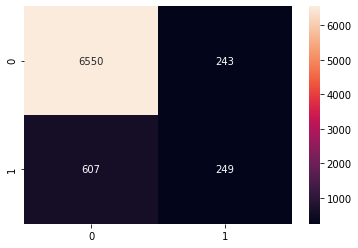

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_valid,y_pred_rf), fmt = 'd', annot=True)

In [ ]:
# Scores
print(classification_report(y_valid, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6793
           1       0.51      0.29      0.37       856

    accuracy                           0.89      7649
   macro avg       0.71      0.63      0.65      7649
weighted avg       0.87      0.89      0.88      7649



In [ ]:
#auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.7660263245149281

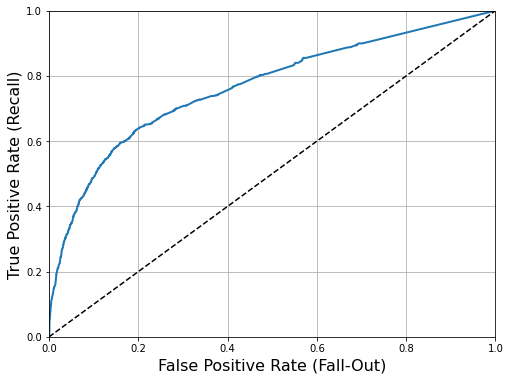

In [ ]:
# auc 커브
fpr_rf, tpr_rf, thresholds = roc_curve(y_valid, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.show()

##**Optimized Random Forest**

In [ ]:
# 파라미터 최적화 과정 
parameters=[{'n_estimators':range(1,300,10),'max_leaf_nodes':range(2,20,2),'max_features':range(1,5)}]
rforest=RandomForestClassifier()
grid_rforest=GridSearchCV(rforest,param_grid=parameters,cv=5,refit=True)
grid_rforest.fit(X_train,y_train)
pd.DataFrame(grid_rforest.cv_results_).sort_values(by=['rank_test_score']).head(3)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
1052       0.137430      0.002866  ...        0.002078                1
934        0.238955      0.009430  ...        0.001769                2
1055       0.319692      0.003954  ...        0.002204                3

[3 rows x 16 columns]

In [ ]:
# 최적화 결과
rnd_clf = RandomForestClassifier(n_estimators=21, max_leaf_nodes=18, random_state=42,max_features=4)
rnd_clf.fit(X_train, y_train)
y_proba_rf=pd.DataFrame(rnd_clf.predict_proba(X_valid)[:,1],index=y_valid.index)
y_pred_rf = rnd_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_rf))

0.9009020787030985


In [ ]:
y_valid

37914    1
6653     0
24353    0
14127    0
14638    0
        ..
38276    1
28819    0
31925    0
3329     0
30951    0
Name: y, Length: 7649, dtype: int64

In [ ]:
y_proba_rf

0
37914  0.346738
6653   0.049452
24353  0.087555
14127  0.062050
14638  0.057005
...         ...
38276  0.341192
28819  0.125090
31925  0.087950
3329   0.047328
30951  0.087622

[7649 rows x 1 columns]

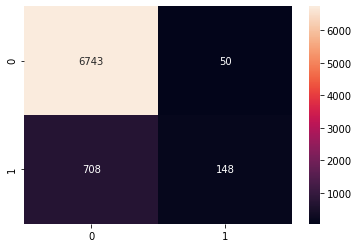

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_valid,y_pred_rf), fmt = 'd', annot=True)

In [ ]:
# Scores
print(classification_report(y_valid, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      6793
           1       0.75      0.17      0.28       856

    accuracy                           0.90      7649
   macro avg       0.83      0.58      0.61      7649
weighted avg       0.89      0.90      0.87      7649



In [ ]:
# auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.7903019325831566

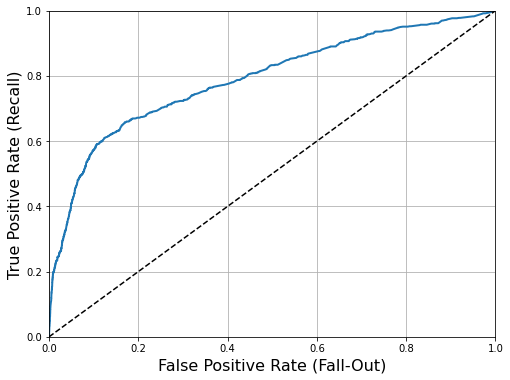

In [ ]:
# auc 커브
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.show()

#**MinMaxScaler**

In [ ]:
# 데이터 업로드 
X_train=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/X_train.pkl')
X_valid=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/X_valid.pkl')
y_train=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/y_train.pkl')
y_valid=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/y_valid.pkl')

In [ ]:
# 스케일링
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_train

age_range_20  age_range_30  ...  euribor3m  nr.employed
21958           0.0           1.0  ...   0.981637     1.000000
1941            1.0           0.0  ...   0.956926     0.859735
20888           0.0           0.0  ...   0.981637     1.000000
2041            0.0           0.0  ...   0.957379     0.859735
6924            1.0           0.0  ...   0.958059     0.859735
...             ...           ...  ...        ...          ...
40537           1.0           0.0  ...   0.057583     0.105860
29216           0.0           1.0  ...   0.174790     0.512287
3859            0.0           1.0  ...   0.957833     0.859735
37858           1.0           0.0  ...   0.043301     0.425709
18522           0.0           0.0  ...   0.982544     1.000000

[22947 rows x 46 columns]

##**Unoptimized Random Forest**

In [ ]:
# 파라미터 최적화 이전의 결과물
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_proba_rf=pd.DataFrame(rnd_clf.predict_proba(X_valid)[:,1],index=y_valid.index)
y_pred_rf = rnd_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_rf))

0.8890050987057132


In [ ]:
y_proba_rf

0
37914  0.300000
6653   0.310000
24353  0.130000
14127  0.190000
14638  0.315000
...         ...
38276  0.212500
28819  0.315000
31925  0.256667
3329   0.157262
30951  0.240000

[7649 rows x 1 columns]

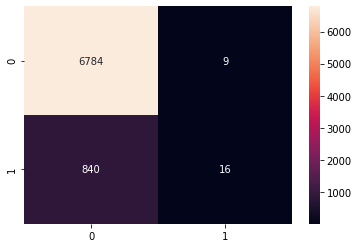

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_valid,y_pred_rf), fmt = 'd', annot=True)

In [ ]:
# Scores
print(classification_report(y_valid, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6793
           1       0.64      0.02      0.04       856

    accuracy                           0.89      7649
   macro avg       0.76      0.51      0.49      7649
weighted avg       0.86      0.89      0.84      7649



In [ ]:
#auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.6802301984863472

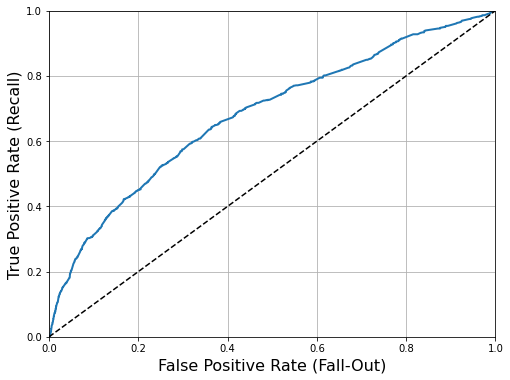

In [ ]:
# auc 커브
fpr_rf, tpr_rf, thresholds = roc_curve(y_valid, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.show()

##**Optimized Random Forest**

In [ ]:
# 파라미터 최적화 과정 
parameters=[{'n_estimators':range(1,300,10),'max_leaf_nodes':range(2,20,2),'max_features':range(1,5)}]
rforest=RandomForestClassifier()
grid_rforest=GridSearchCV(rforest,param_grid=parameters,cv=5,refit=True)
grid_rforest.fit(X_train,y_train)
pd.DataFrame(grid_rforest.cv_results_).sort_values(by=['rank_test_score']).head(3)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
904       0.229511      0.004959  ...        0.001898                1
633       0.158423      0.003789  ...        0.001838                2
754       0.222855      0.006490  ...        0.001536                3

[3 rows x 16 columns]

In [ ]:
# 최적화 결과
rnd_clf = RandomForestClassifier(n_estimators=41, max_leaf_nodes=8, random_state=42,max_features=4)
rnd_clf.fit(X_train, y_train)
y_proba_rf=pd.DataFrame(rnd_clf.predict_proba(X_valid)[:,1],index=y_valid.index)
y_pred_rf = rnd_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_rf))

0.8878284743103674


In [ ]:
y_valid

37914    1
6653     0
24353    0
14127    0
14638    0
        ..
38276    1
28819    0
31925    0
3329     0
30951    0
Name: y, Length: 7649, dtype: int64

In [ ]:
y_proba_rf

0
37914  0.145381
6653   0.056514
24353  0.163904
14127  0.085109
14638  0.080166
...         ...
38276  0.204549
28819  0.143264
31925  0.137297
3329   0.056711
30951  0.130911

[7649 rows x 1 columns]

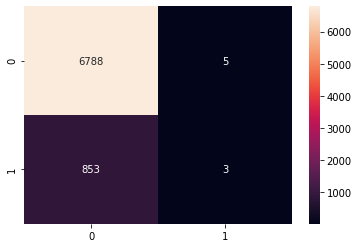

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_valid,y_pred_rf), fmt = 'd', annot=True)

In [ ]:
# Scores
print(' precision_score   ','recall_score       ','f1_score','\n',precision_score(y_valid,y_pred_rf),recall_score(y_valid,y_pred_rf),f1_score(y_valid,y_pred_rf))

 precision_score    recall_score        f1_score 
 0.375 0.0035046728971962616 0.006944444444444444


In [ ]:
# auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.7712418879522764

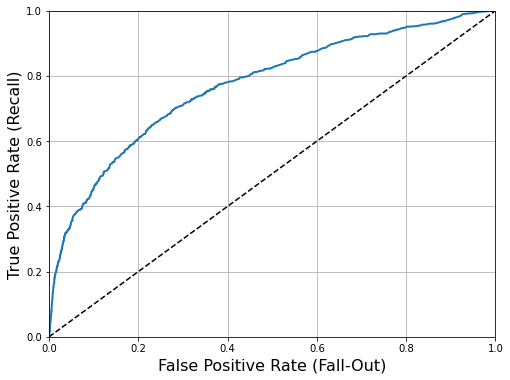

In [ ]:
# auc 커브
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.show()

#**Robust Scaling**

In [ ]:
# 데이터 업로드 
X_train=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/X_train.pkl')
X_valid=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/X_valid.pkl')
y_train=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/y_train.pkl')
y_valid=pd.read_pickle('/content/drive/Shareddrives/빅데이터핀테크_6조/MLDL/data/y_valid.pkl')

In [ ]:
# 스케일링
scaler=RobustScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_train

age_range_20  age_range_30  ...  euribor3m  nr.employed
21958           0.0           1.0  ...   0.029583     0.287597
1941            1.0           0.0  ...  -0.000553     0.000000
20888           0.0           0.0  ...   0.029583     0.287597
2041            0.0           0.0  ...   0.000000     0.000000
6924            1.0           0.0  ...   0.000829     0.000000
...             ...           ...  ...        ...          ...
40537           1.0           0.0  ...  -1.097318    -1.545736
29216           0.0           1.0  ...  -0.954382    -0.712403
3859            0.0           1.0  ...   0.000553     0.000000
37858           1.0           0.0  ...  -1.114736    -0.889922
18522           0.0           0.0  ...   0.030688     0.287597

[22947 rows x 46 columns]

##**Unoptimized Random Forest**

In [ ]:
# 파라미터 최적화 이전의 결과물
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_proba_rf=pd.DataFrame(rnd_clf.predict_proba(X_valid)[:,1],index=y_valid.index)
y_pred_rf = rnd_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_rf))

0.88769773826644


In [ ]:
y_proba_rf

0
37914  0.314167
6653   0.170000
24353  0.130000
14127  0.205000
14638  0.180000
...         ...
38276  0.300000
28819  0.341667
31925  0.240833
3329   0.205000
30951  0.290000

[7649 rows x 1 columns]

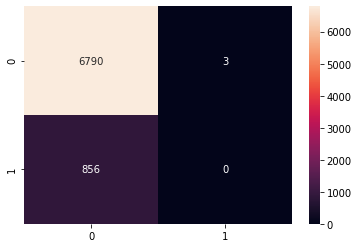

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_valid,y_pred_rf), fmt = 'd', annot=True)

In [ ]:
# Scores
print(classification_report(y_valid, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6793
           1       0.00      0.00      0.00       856

    accuracy                           0.89      7649
   macro avg       0.44      0.50      0.47      7649
weighted avg       0.79      0.89      0.84      7649



In [ ]:
#auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.7213022338828728

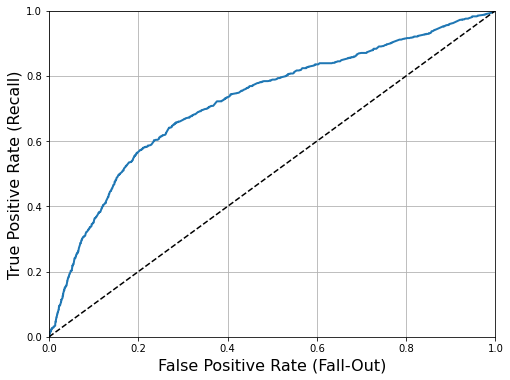

In [ ]:
# auc 커브
fpr_rf, tpr_rf, thresholds = roc_curve(y_valid, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.show()

##**Optimized Random Forest**

In [ ]:
# 파라미터 최적화 과정 
parameters=[{'n_estimators':range(1,300,10),'max_leaf_nodes':range(2,20,2),'max_features':range(1,5)}]
rforest=RandomForestClassifier()
grid_rforest=GridSearchCV(rforest,param_grid=parameters,cv=5,refit=True)
grid_rforest.fit(X_train,y_train)
pd.DataFrame(grid_rforest.cv_results_).sort_values(by=['rank_test_score']).head(3)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
964        0.234347      0.004690  ...        0.002132                1
1059       0.531736      0.018302  ...        0.002304                2
1058       0.481008      0.010594  ...        0.002258                3

[3 rows x 16 columns]

In [ ]:
# 최적화 결과
rnd_clf = RandomForestClassifier(n_estimators=41, max_leaf_nodes=12, random_state=42,max_features=4)
rnd_clf.fit(X_train, y_train)
y_proba_rf=pd.DataFrame(rnd_clf.predict_proba(X_valid)[:,1],index=y_valid.index)
y_pred_rf = rnd_clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred_rf))

0.888089946398222


In [ ]:
y_valid

37914    1
6653     0
24353    0
14127    0
14638    0
        ..
38276    1
28819    0
31925    0
3329     0
30951    0
Name: y, Length: 7649, dtype: int64

In [ ]:
y_proba_rf

0
37914  0.171934
6653   0.055979
24353  0.091969
14127  0.084230
14638  0.080101
...         ...
38276  0.186367
28819  0.153689
31925  0.151690
3329   0.054941
30951  0.130572

[7649 rows x 1 columns]

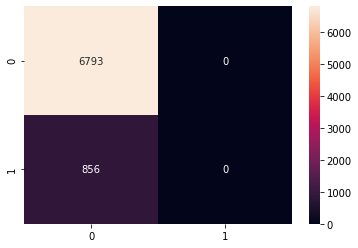

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_valid,y_pred_rf), fmt = 'd', annot=True)

In [ ]:
# Scores
print(classification_report(y_valid, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6793
           1       0.00      0.00      0.00       856

    accuracy                           0.89      7649
   macro avg       0.44      0.50      0.47      7649
weighted avg       0.79      0.89      0.84      7649



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.7768333881359453

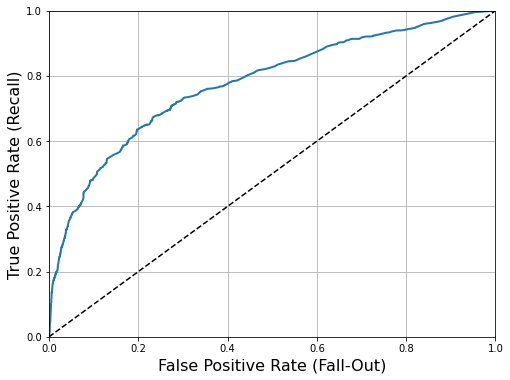

In [ ]:
# auc 커브
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
plt.show()